<a href="https://colab.research.google.com/github/sezaionurlu/Rating-Product-Sorting-Reviews-in-Amazon/blob/main/Rating_Product_%26_Sorting_Reviews_in_Amazon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**İş Problemi**

E-ticaretteki en önemli problemlerden bir tanesi ürünlere satış
sonrası verilen puanların doğru şekilde hesaplanmasıdır. Bu
problemin çözümü e-ticaret sitesi için daha fazla müşteri
memnuniyeti sağlamak, satıcılar için ürünün öne çıkması ve satın
alanlar için sorunsuz bir alışveriş deneyimi demektir. Bir diğer
problem ise ürünlere verilen yorumların doğru bir şekilde
sıralanması olarak karşımıza çıkmaktadır. Yanıltıcı yorumların öne
çıkması ürünün satışını doğrudan etkileyeceğinden dolayı hem
maddi kayıp hem de müşteri kaybına neden olacaktır. Bu 2 temel
problemin çözümünde e-ticaret sitesi ve satıcılar satışlarını
arttırırken müşteriler ise satın alma yolculuğunu sorunsuz olarak
tamamlayacaktır.

**Veri Seti Hikayesi**

Amazon ürün verilerini içeren bu veri seti ürün kategorileri ile çeşitli metadataları içermektedir. Elektronik kategorisindeki en
fazla yorum alan ürünün kullanıcı puanları ve yorumları vardır.

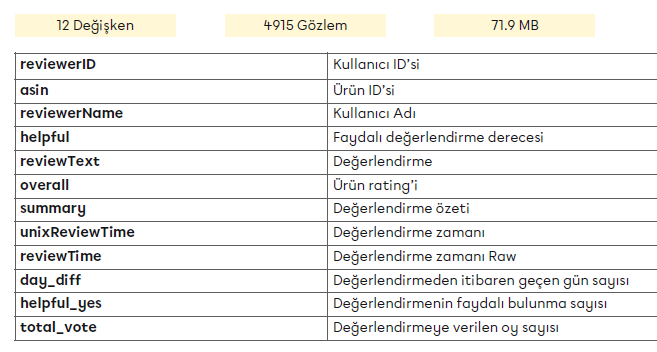

In [ ]:
import pandas as pd
import math
import scipy.stats as st
from sklearn.preprocessing import MinMaxScaler

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', 500)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.float_format', lambda x: '%.5f' % x)

**Proje Görevleri**

*Görev 1: Average Rating’i güncel yorumlara göre hesaplayınız ve var olan average rating ile kıyaslayınız.*

Paylaşılan veri setinde kullanıcılar bir ürüne puanlar vermiş ve yorumlar yapmıştır. Bu görevde amacımız verilen puanları tarihe göre
ağırlıklandırarak değerlendirmek. İlk ortalama puan ile elde edilecek tarihe göre ağırlıklı puanın karşılaştırılması gerekmektedir.

In [ ]:
df_ = pd.read_csv('/content/drive/MyDrive/Veri Bilimi/Ödevler/4/amazon_review.csv')

In [ ]:
df = df_.copy()

In [ ]:
df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,day_diff,helpful_yes,total_vote
0,A3SBTW3WS4IQSN,B007WTAJTO,NaN,"[0, 0]",No issues.,4.00000,Four Stars,1406073600,2014-07-23,138,0,0
1,A18K1ODH1I2MVB,B007WTAJTO,0mie,"[0, 0]","Purchased this for my device, it worked as adv...",5.00000,MOAR SPACE!!!,1382659200,2013-10-25,409,0,0
2,A2FII3I2MBMUIA,B007WTAJTO,1K3,"[0, 0]",it works as expected. I should have sprung for...,4.00000,nothing to really say....,1356220800,2012-12-23,715,0,0
3,A3H99DFEG68SR,B007WTAJTO,1m2,"[0, 0]",This think has worked out great.Had a diff. br...,5.00000,Great buy at this price!!! *** UPDATE,1384992000,2013-11-21,382,0,0
4,A375ZM4U047O79,B007WTAJTO,2&amp;1/2Men,"[0, 0]","Bought it with Retail Packaging, arrived legit...",5.00000,best deal around,1373673600,2013-07-13,513,0,0


In [ ]:
# Adım 1: Ürünün ortalama puanını hesaplayınız.

In [ ]:
df['overall'].mean()

4.587589013224822

In [ ]:
# Adım 2: Tarihe göre ağırlıklı puan ortalamasını hesaplayınız.

# • reviewTime değişkenini tarih değişkeni olarak tanıtmanız
# • reviewTime'ın max değerini current_date olarak kabul etmeniz
# • her bir puan-yorum tarihi ile current_date'in farkını gün cinsinden ifade ederek yeni değişken oluşturmanız ve gün cinsinden ifade edilen
# değişkeni quantile fonksiyonu ile 4'e bölüp (3 çeyrek verilirse 4 parça çıkar) çeyrekliklerden gelen değerlere göre ağırlıklandırma yapmanız
# gerekir. Örneğin q1 = 12 ise ağırlıklandırırken 12 günden az süre önce yapılan yorumların ortalamasını alıp bunlara yüksek ağırlık vermek gibi.

In [ ]:
df['reviewTime'] = pd.to_datetime(df['reviewTime'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4915 entries, 0 to 4914
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   reviewerID      4915 non-null   object        
 1   asin            4915 non-null   object        
 2   reviewerName    4914 non-null   object        
 3   helpful         4915 non-null   object        
 4   reviewText      4914 non-null   object        
 5   overall         4915 non-null   float64       
 6   summary         4915 non-null   object        
 7   unixReviewTime  4915 non-null   int64         
 8   reviewTime      4915 non-null   datetime64[ns]
 9   day_diff        4915 non-null   int64         
 10  helpful_yes     4915 non-null   int64         
 11  total_vote      4915 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(4), object(6)
memory usage: 460.9+ KB


In [ ]:
current_date = df['reviewTime'].max()

In [ ]:
current_date

Timestamp('2014-12-07 00:00:00')

In [ ]:
df['days'] = (current_date - df['reviewTime']).dt.days

In [ ]:
df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,day_diff,helpful_yes,total_vote,days
0,A3SBTW3WS4IQSN,B007WTAJTO,NaN,"[0, 0]",No issues.,4.00000,Four Stars,1406073600,2014-07-23,138,0,0,137
1,A18K1ODH1I2MVB,B007WTAJTO,0mie,"[0, 0]","Purchased this for my device, it worked as adv...",5.00000,MOAR SPACE!!!,1382659200,2013-10-25,409,0,0,408
2,A2FII3I2MBMUIA,B007WTAJTO,1K3,"[0, 0]",it works as expected. I should have sprung for...,4.00000,nothing to really say....,1356220800,2012-12-23,715,0,0,714
3,A3H99DFEG68SR,B007WTAJTO,1m2,"[0, 0]",This think has worked out great.Had a diff. br...,5.00000,Great buy at this price!!! *** UPDATE,1384992000,2013-11-21,382,0,0,381
4,A375ZM4U047O79,B007WTAJTO,2&amp;1/2Men,"[0, 0]","Bought it with Retail Packaging, arrived legit...",5.00000,best deal around,1373673600,2013-07-13,513,0,0,512


In [ ]:
df.days.describe().T

count   4915.00000
mean     436.36704
std      209.43987
min        0.00000
25%      280.00000
50%      430.00000
75%      600.00000
max     1063.00000
Name: days, dtype: float64

In [ ]:
q_1 = df["days"].quantile(0.25)
q_1

280.0

In [ ]:
q_2 = df["days"].quantile(0.50)
q_2

430.0

In [ ]:
q_3 = df["days"].quantile(0.75)
q_3

600.0

In [ ]:
print(df.loc[(df["days"] <= 280), "overall"].mean())
print(df.loc[(df["days"] > 281) & (df["day_diff"] <= 430), "overall"].mean())
print(df.loc[(df["days"] > 431) & (df["day_diff"] <= 600), "overall"].mean())
print(df.loc[(df["days"] > 601), "overall"].mean())

4.6957928802588995
4.634085213032582
4.571428571428571
4.443535188216039


In [ ]:
df.loc[df["days"] <= 280, "overall"].mean() * 28/100 + \
    df.loc[(df["days"] > 281) & (df["days"] <= 430), "overall"].mean() * 26/100 + \
    df.loc[(df["days"] > 431) & (df["days"] <= 600), "overall"].mean() * 24/100 + \
    df.loc[(df["days"] > 601), "overall"].mean() * 22/100

4.594150260095649

In [ ]:
# Adım 3: Ağırlıklandırılmış puanlamada her bir zaman diliminin ortalamasını karşılaştırıp yorumlayınız.

In [ ]:
print(df.loc[(df["days"] <= 280), "overall"].mean() *28/100)
print(df.loc[(df["days"] > 281) & (df["day_diff"] <= 430), "overall"].mean() * 26/100)
print(df.loc[(df["days"] > 431) & (df["day_diff"] <= 600), "overall"].mean() * 24/100)
print(df.loc[(df["days"] > 601), "overall"].mean() * 22/100)

1.3148220064724918
1.2048621553884713
1.097142857142857
0.9775777414075286


*Görev 2: Ürün için ürün detay sayfasında görüntülenecek 20 review’i belirleyiniz.*

In [ ]:
# Adım 1: helpful_no değişkenini üretiniz.

# • total_vote bir yoruma verilen toplam up-down sayısıdır.
# • up, helpful demektir.
# • Veri setinde helpful_no değişkeni yoktur, var olan değişkenler üzerinden üretilmesi gerekmektedir.
# • Toplam oy sayısından (total_vote) yararlı oy sayısı (helpful_yes) çıkarılarak yararlı bulunmayan oy sayılarını (helpful_no) bulunuz.

In [ ]:
df['helpful_no'] = df['total_vote'] - df['helpful_yes']

In [ ]:
df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,day_diff,helpful_yes,total_vote,days,score,helpful_no
0,A3SBTW3WS4IQSN,B007WTAJTO,NaN,"[0, 0]",No issues.,4.00000,Four Stars,1406073600,2014-07-23,138,0,0,137,"(-1.063, 354.333]",0
1,A18K1ODH1I2MVB,B007WTAJTO,0mie,"[0, 0]","Purchased this for my device, it worked as adv...",5.00000,MOAR SPACE!!!,1382659200,2013-10-25,409,0,0,408,"(354.333, 708.667]",0
2,A2FII3I2MBMUIA,B007WTAJTO,1K3,"[0, 0]",it works as expected. I should have sprung for...,4.00000,nothing to really say....,1356220800,2012-12-23,715,0,0,714,"(708.667, 1063.0]",0
3,A3H99DFEG68SR,B007WTAJTO,1m2,"[0, 0]",This think has worked out great.Had a diff. br...,5.00000,Great buy at this price!!! *** UPDATE,1384992000,2013-11-21,382,0,0,381,"(354.333, 708.667]",0
4,A375ZM4U047O79,B007WTAJTO,2&amp;1/2Men,"[0, 0]","Bought it with Retail Packaging, arrived legit...",5.00000,best deal around,1373673600,2013-07-13,513,0,0,512,"(354.333, 708.667]",0


In [ ]:
df['helpful_no'].value_counts()

0      4674
1       175
2        43
3         7
27        2
       ... 
183       1
77        1
126       1
14        1
9         1
Name: helpful_no, Length: 17, dtype: int64

In [ ]:
# Adım 2: score_pos_neg_diff, score_average_rating ve wilson_lower_bound skorlarını hesaplayıp veriye ekleyiniz.

# • score_pos_neg_diff, score_average_rating ve wilson_lower_bound skorlarını hesaplayabilmek için score_pos_neg_diff,
# score_average_rating ve wilson_lower_bound fonksiyonlarını tanımlayınız.
# • score_pos_neg_diff'a göre skorlar oluşturunuz. Ardından; df içerisinde score_pos_neg_diff ismiyle kaydediniz.
# • score_average_rating'a göre skorlar oluşturunuz. Ardından; df içerisinde score_average_rating ismiyle kaydediniz.
# • wilson_lower_bound'a göre skorlar oluşturunuz. Ardından; df içerisinde wilson_lower_bound ismiyle kaydediniz.

In [ ]:
def score_up_down_diff(up, down):
    return up - down

In [ ]:
# score_pos_neg_diff
df["score_pos_neg_diff"] = df.apply(lambda x: score_up_down_diff(x["helpful_yes"], x["helpful_no"]), axis=1)

In [ ]:
def score_average_rating(up, down):
    if up + down == 0:
        return 0
    return up / (up + down)

In [ ]:
# score_average_rating
df["score_average_rating"] = df.apply(lambda x: score_average_rating(x["helpful_yes"], x["helpful_no"]), axis=1)

In [ ]:
def wilson_lower_bound(up, down, confidence=0.95):
    """
    Wilson Lower Bound Score hesapla

    - Bernoulli parametresi p için hesaplanacak güven aralığının alt sınırı WLB skoru olarak kabul edilir.
    - Hesaplanacak skor ürün sıralaması için kullanılır.
    - Not:
    Eğer skorlar 1-5 arasıdaysa 1-3 negatif, 4-5 pozitif olarak işaretlenir ve bernoulli'ye uygun hale getirilebilir.
    Bu beraberinde bazı problemleri de getirir. Bu sebeple bayesian average rating yapmak gerekir.

    Parameters
    ----------
    up: int
        up count
    down: int
        down count
    confidence: float
        confidence

    Returns
    -------
    wilson score: float

    """
    n = up + down
    if n == 0:
        return 0
    z = st.norm.ppf(1 - (1 - confidence) / 2)
    phat = 1.0 * up / n
    return (phat + z * z / (2 * n) - z * math.sqrt((phat * (1 - phat) + z * z / (4 * n)) / n)) / (1 + z * z / n)

In [ ]:
# wilson_lower_bound
df["wilson_lower_bound"] = df.apply(lambda x: wilson_lower_bound(x["helpful_yes"], x["helpful_no"]), axis=1)

In [ ]:
df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,day_diff,helpful_yes,total_vote,days,score,helpful_no,score_pos_neg_diff,score_average_rating,wilson_lower_bound
0,A3SBTW3WS4IQSN,B007WTAJTO,NaN,"[0, 0]",No issues.,4.00000,Four Stars,1406073600,2014-07-23,138,0,0,137,"(-1.063, 354.333]",0,0,0.00000,0.00000
1,A18K1ODH1I2MVB,B007WTAJTO,0mie,"[0, 0]","Purchased this for my device, it worked as adv...",5.00000,MOAR SPACE!!!,1382659200,2013-10-25,409,0,0,408,"(354.333, 708.667]",0,0,0.00000,0.00000
2,A2FII3I2MBMUIA,B007WTAJTO,1K3,"[0, 0]",it works as expected. I should have sprung for...,4.00000,nothing to really say....,1356220800,2012-12-23,715,0,0,714,"(708.667, 1063.0]",0,0,0.00000,0.00000
3,A3H99DFEG68SR,B007WTAJTO,1m2,"[0, 0]",This think has worked out great.Had a diff. br...,5.00000,Great buy at this price!!! *** UPDATE,1384992000,2013-11-21,382,0,0,381,"(354.333, 708.667]",0,0,0.00000,0.00000
4,A375ZM4U047O79,B007WTAJTO,2&amp;1/2Men,"[0, 0]","Bought it with Retail Packaging, arrived legit...",5.00000,best deal around,1373673600,2013-07-13,513,0,0,512,"(354.333, 708.667]",0,0,0.00000,0.00000


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
overall,4915.00000,4.58759,0.99685,1.00000,5.00000,5.00000,5.00000,5.00000
unixReviewTime,4915.00000,1379465001.66836,15818574.32275,1339200000.00000,1365897600.00000,1381276800.00000,1392163200.00000,1406073600.00000
day_diff,4915.00000,437.36704,209.43987,1.00000,281.00000,431.00000,601.00000,1064.00000
helpful_yes,4915.00000,1.31109,41.61916,0.00000,0.00000,0.00000,0.00000,1952.00000
total_vote,4915.00000,1.52146,44.12309,0.00000,0.00000,0.00000,0.00000,2020.00000
days,4915.00000,436.36704,209.43987,0.00000,280.00000,430.00000,600.00000,1063.00000
helpful_no,4915.00000,0.21038,4.02330,0.00000,0.00000,0.00000,0.00000,183.00000
score_pos_neg_diff,4915.00000,1.10071,39.36795,-130.00000,0.00000,0.00000,0.00000,1884.00000
score_average_rating,4915.00000,0.07547,0.25606,0.00000,0.00000,0.00000,0.00000,1.00000
wilson_lower_bound,4915.00000,0.02005,0.07719,0.00000,0.00000,0.00000,0.00000,0.95754


In [ ]:
# Adım 3: 20 Yorumu belirleyiniz ve sonuçları Yorumlayınız.

# • wilson_lower_bound'a göre ilk 20 yorumu belirleyip sıralayanız.
# • Sonuçları yorumlayınız.

In [ ]:
df.sort_values('wilson_lower_bound', ascending =False).head(20)

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,day_diff,helpful_yes,total_vote,days,score,helpful_no,score_pos_neg_diff,score_average_rating,wilson_lower_bound
2031,A12B7ZMXFI6IXY,B007WTAJTO,"Hyoun Kim ""Faluzure""","[1952, 2020]",[[ UPDATE - 6/19/2014 ]]So my lovely wife boug...,5.00000,UPDATED - Great w/ Galaxy S4 & Galaxy Tab 4 10...,1367366400,2013-01-05,702,1952,2020,701,"(354.333, 708.667]",68,1884,0.96634,0.95754
3449,AOEAD7DPLZE53,B007WTAJTO,NLee the Engineer,"[1428, 1505]",I have tested dozens of SDHC and micro-SDHC ca...,5.00000,Top of the class among all (budget-priced) mic...,1348617600,2012-09-26,803,1428,1505,802,"(708.667, 1063.0]",77,1351,0.94884,0.93652
4212,AVBMZZAFEKO58,B007WTAJTO,SkincareCEO,"[1568, 1694]",NOTE: please read the last update (scroll to ...,1.00000,1 Star reviews - Micro SDXC card unmounts itse...,1375660800,2013-05-08,579,1568,1694,578,"(354.333, 708.667]",126,1442,0.92562,0.91214
317,A1ZQAQFYSXL5MQ,B007WTAJTO,"Amazon Customer ""Kelly""","[422, 495]","If your card gets hot enough to be painful, it...",1.00000,"Warning, read this!",1346544000,2012-02-09,1033,422,495,1032,"(708.667, 1063.0]",73,349,0.85253,0.81858
4672,A2DKQQIZ793AV5,B007WTAJTO,Twister,"[45, 49]",Sandisk announcement of the first 128GB micro ...,5.00000,Super high capacity!!! Excellent price (on Am...,1394150400,2014-07-03,158,45,49,157,"(-1.063, 354.333]",4,41,0.91837,0.80811
1835,A1J6VSUM80UAF8,B007WTAJTO,goconfigure,"[60, 68]",Bought from BestBuy online the day it was anno...,5.00000,I own it,1393545600,2014-02-28,283,60,68,282,"(-1.063, 354.333]",8,52,0.88235,0.78465
3981,A1K91XXQ6ZEBQR,B007WTAJTO,"R. Sutton, Jr. ""RWSynergy""","[112, 139]",The last few days I have been diligently shopp...,5.00000,"Resolving confusion between ""Mobile Ultra"" and...",1350864000,2012-10-22,777,112,139,776,"(708.667, 1063.0]",27,85,0.80576,0.73214
3807,AFGRMORWY2QNX,B007WTAJTO,R. Heisler,"[22, 25]",I bought this card to replace a lost 16 gig in...,3.00000,"Good buy for the money but wait, I had an issue!",1361923200,2013-02-27,649,22,25,648,"(354.333, 708.667]",3,19,0.88000,0.70044
4306,AOHXKM5URSKAB,B007WTAJTO,Stellar Eller,"[51, 65]","While I got this card as a ""deal of the day"" o...",5.00000,Awesome Card!,1339200000,2012-09-06,823,51,65,822,"(708.667, 1063.0]",14,37,0.78462,0.67033
4596,A1WTQUOQ4WG9AI,B007WTAJTO,"Tom Henriksen ""Doggy Diner""","[82, 109]",Hi:I ordered two card and they arrived the nex...,1.00000,Designed incompatibility/Don't support SanDisk,1348272000,2012-09-22,807,82,109,806,"(708.667, 1063.0]",27,55,0.75229,0.66359
